# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [10]:
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

Draw a dispersion diagram (scatter plot) for the data.

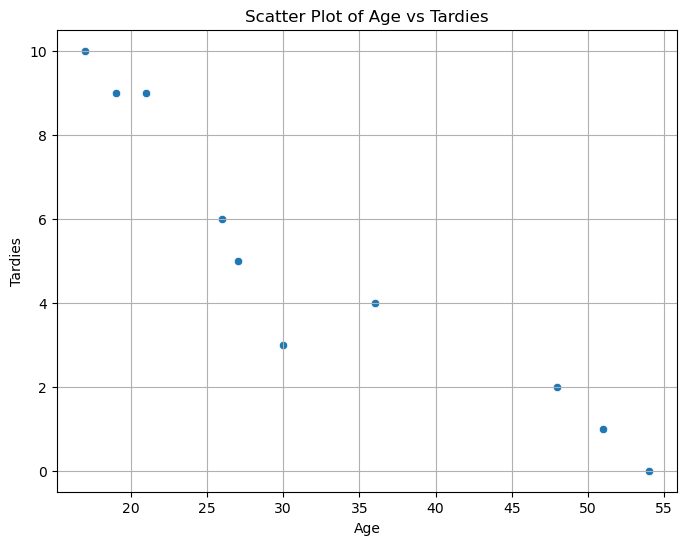

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Tardies', data=student_data)
plt.title("Scatter Plot of Age vs Tardies")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### Explanation:
- The scatter plot shows a negative trend: younger students seem to have more tardies compared to older students.
- Hypothesis: As age increases, tardiness decreases.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [18]:
# Calculate covariance and correlation
covariance = np.cov(student_data['Age'], student_data['Tardies'])[0, 1]
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0, 1]

# Covariance and correlation explanation
print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Covariance measures the joint variability of two variables, while correlation standardizes this measure.
Correlation is dimensionless and indicates the strength and direction of a linear relationship. Here, the negative correlation (-0.94) suggests a strong inverse linear relationship.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
X = student_data[['Age']]
y = student_data['Tardies']
model = LinearRegression().fit(X, y)

# Coefficients of the model
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")

Intercept: 12.888803363135771
Slope: -0.2428207709159809


Plot your regression model on your scatter plot.

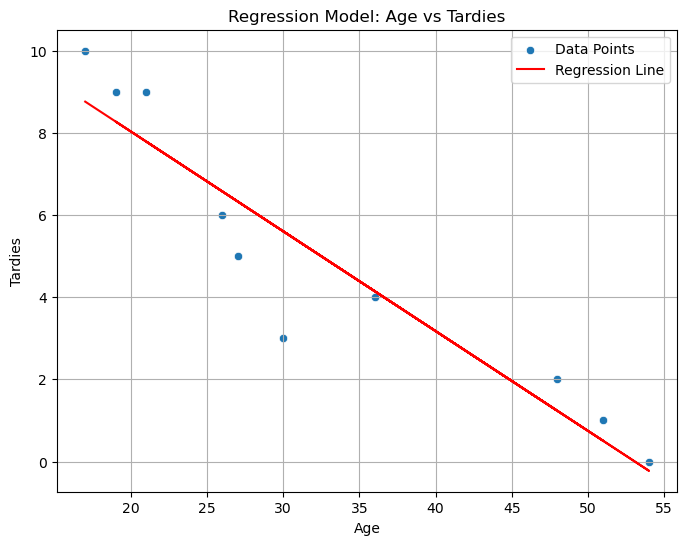

In [24]:
# Plot the regression model
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Tardies', data=student_data, label="Data Points")
plt.plot(student_data['Age'], model.predict(X), color='red', label="Regression Line")
plt.title("Regression Model: Age vs Tardies")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.legend()
plt.grid(True)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

#### Model interpretation:
- The regression line has a negative slope, confirming the inverse relationship.
- Younger age is associated with more tardies.
- However, other factors could influence tardiness, so age alone may not fully explain it.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [49]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/paolarivera/Documents/Ironhack/Week 4/Day 3/lab-regression-analysis-en-main/vehicles.csv')

In [52]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [55]:
# Selecting relevant columns for analysis
columns = [
    "Year", 
    "Cylinders", 
    "Fuel Barrels/Year", 
    "Combined MPG", 
    "Fuel Cost/Year", 
    "CO2 Emission Grams/Mile"
]
vehicles = vehicles[columns]

In [57]:
# Calculate correlations
correlations = vehicles.corr()

# Display correlations with 'CO2 Emission Grams/Mile'
correlation_with_target = correlations["CO2 Emission Grams/Mile"].sort_values(ascending=False)
print(correlation_with_target)

# Comments:
# Based on the correlation values, the variable with the strongest correlation to CO2 emissions is likely 'Fuel Barrels/Year'.
# The least correlated variable is 'Year', which likely provides the least helpful information.

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [60]:
import statsmodels.api as sm

# Define independent and dependent variables
X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = vehicles["CO2 Emission Grams/Mile"]

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Comments:
# The type of regression used is Multiple Linear Regression.
# Based on the p-values and coefficients, the most important variable is likely 'Fuel Barrels/Year'.
# Variables with high p-values (e.g., 'Year') might not contribute significantly to the model.

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                             14:09:19   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Comments:
# From the regression summary, the variables 'Fuel Barrels/Year' and 'Combined MPG' have the strongest relationships with CO2 emissions.
# Variables like 'Year' may have high p-values, suggesting they are not statistically significant.
# The R-squared value shows how well the model explains the variance in the dependent variable.
# Confidence in the conclusions depends on the R-squared value, adjusted R-squared, and the p-values of the predictors.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [40]:
data = {
    "X": [1, 3, 4, 6, 8, 9, 11, 14],
    "Y": [1, 2, 4, 4, 5, 7, 8, 13]
}
df = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

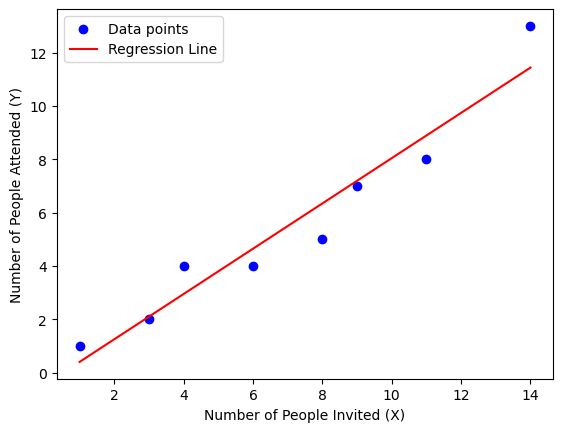

In [42]:
# Scatter plot
plt.scatter(df["X"], df["Y"], color='blue', label='Data points')
plt.xlabel("Number of People Invited (X)")
plt.ylabel("Number of People Attended (Y)")

# Fit regression model
X = df["X"].values.reshape(-1, 1)
y = df["Y"]
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Plot regression line
plt.plot(df["X"], y_pred, color='red', label='Regression Line')
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

#### Comments:
- The scatter plot and regression line suggest a generally positive linear relationship between the variables.
- However, some points may deviate significantly from the trend, indicating possible outliers.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

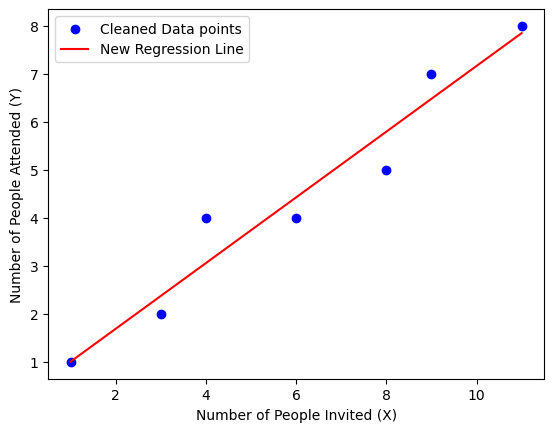

In [46]:
# Identify potential outliers (manual inspection suggests the point (14, 13))
df_cleaned = df[df["X"] != 14]

# Refit regression model
X_cleaned = df_cleaned["X"].values.reshape(-1, 1)
y_cleaned = df_cleaned["Y"]
reg_cleaned = LinearRegression()
reg_cleaned.fit(X_cleaned, y_cleaned)
y_cleaned_pred = reg_cleaned.predict(X_cleaned)

# Plot cleaned data and regression line
plt.scatter(df_cleaned["X"], df_cleaned["Y"], color='blue', label='Cleaned Data points')
plt.plot(df_cleaned["X"], y_cleaned_pred, color='red', label='New Regression Line')
plt.xlabel("Number of People Invited (X)")
plt.ylabel("Number of People Attended (Y)")
plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

#### Comments:
- After removing the outlier, the regression line better fits the remaining data.
- The initial model may have been skewed by the outlier, which distorted the linear relationship.
